# 7장(그래프)-프로그래밍 실습

## 7-1. 그래프의 기본 개념

### [참고] 그래프 그리기
- networkx에서 기본으로 제공하는 그래프는 시자점을 고정할 수 없어 pydot 그래프 레이아웃(또는 graphviz 등)을 이용하여야하며 이를 위해 해당 라이브러리를 설치해야한다.

In [ ]:
# pydot 그래프 모듈설치
!pip install pydot

In [19]:
# graphviz 그래프 모듈설치
!pip install graphviz

- **예제1: 가로 방향 유향 그래프 그리기**

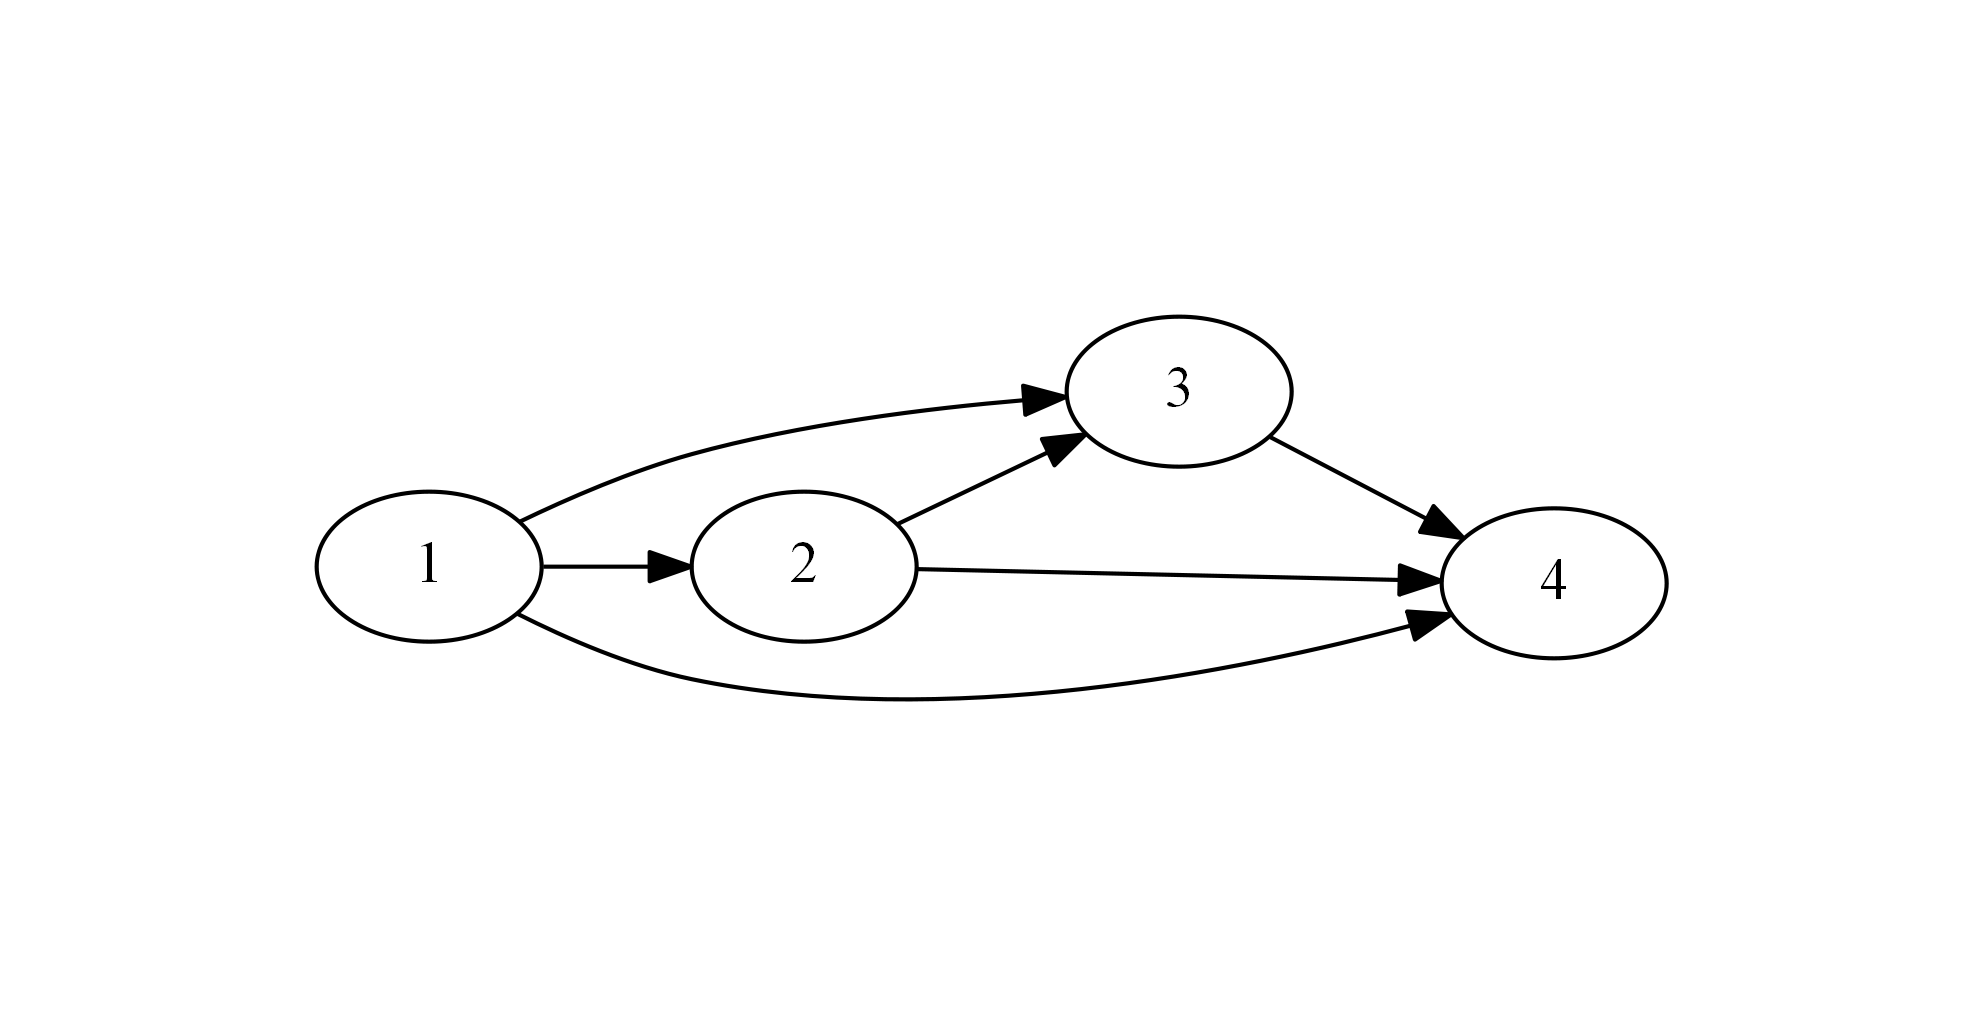

In [4]:
from IPython.core.display import Image
import networkx as nx

V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)} 

# G = nx.Graph() # Graph(무향 그래프)
G = nx.DiGraph() # DirectedGraph(유향 그래프)

G.add_nodes_from(V) # 점 추가
G.add_edges_from(E) # 간선 추가

d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
d1.set_rankdir("LR")   # 수평방향 --> 이 코드 없으면 수직방향
d1.set_margin(1)
Image(d1.create_png(), width=500)

- **예제2: 세로 방향 무향 그래프 그리기**

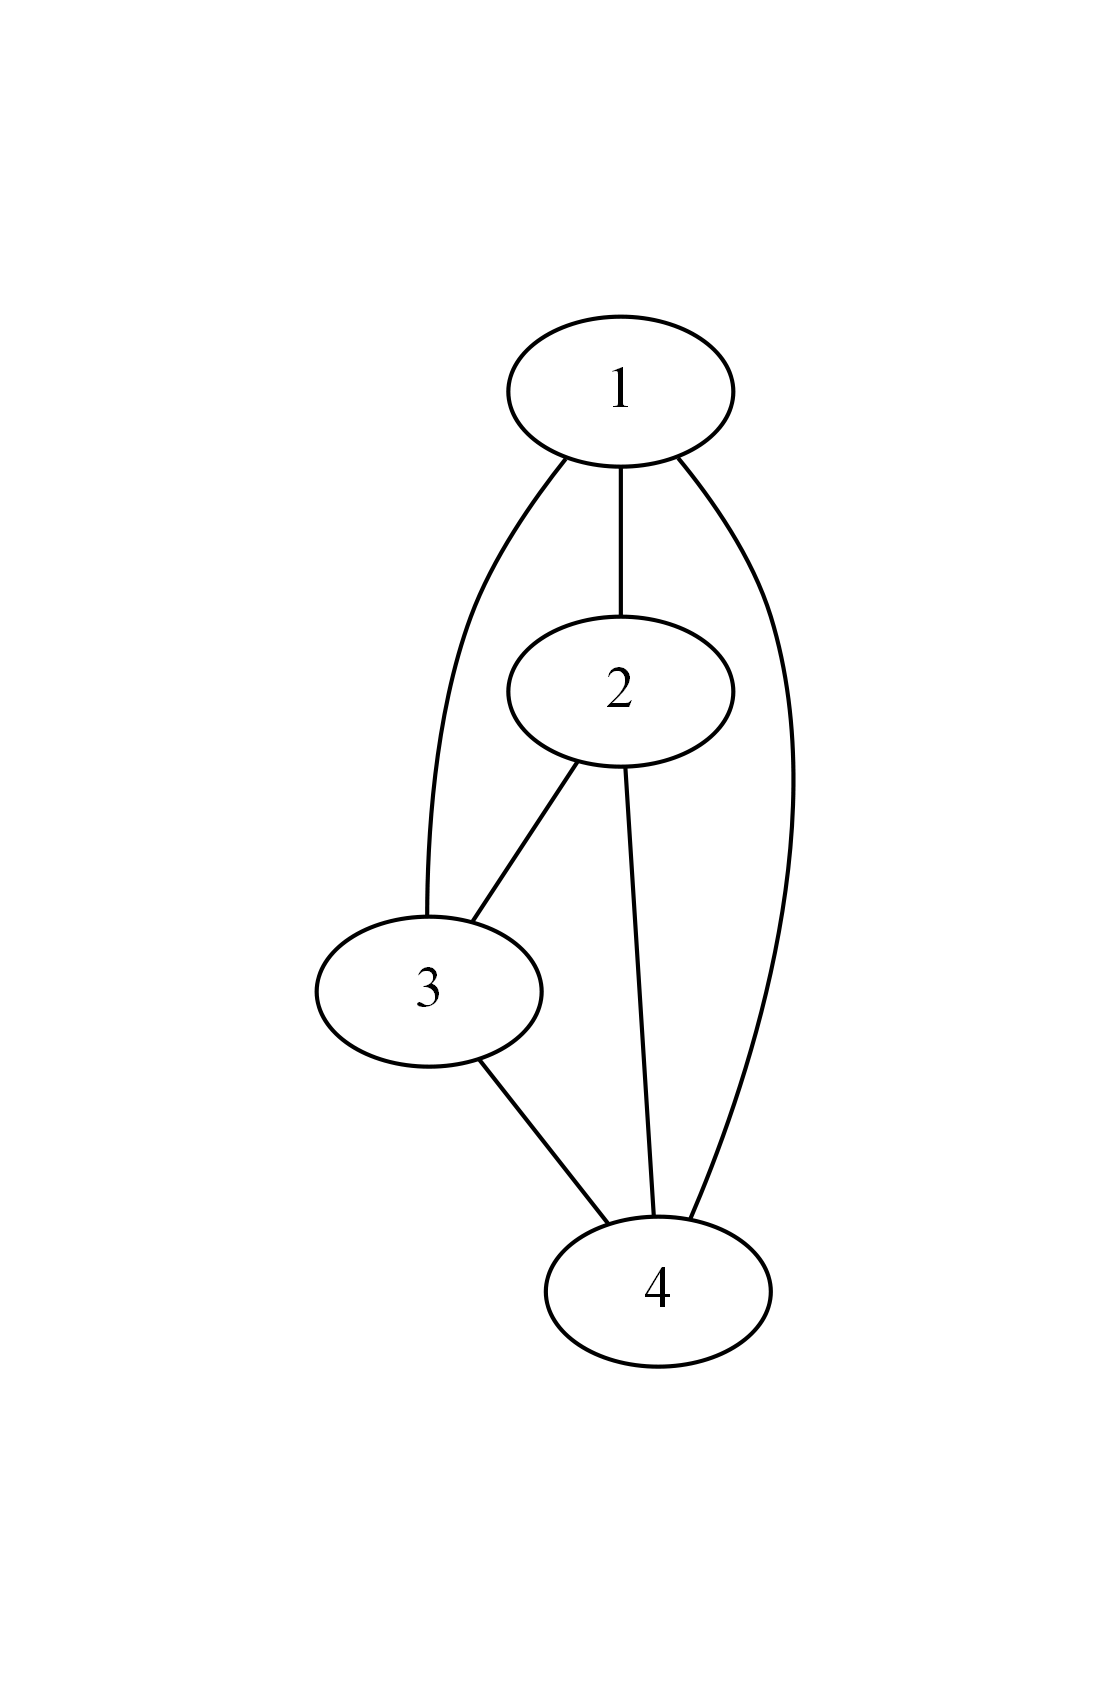

In [24]:
from IPython.core.display import Image
import networkx as nx

V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)} 

G = nx.Graph() # Graph(무향 그래프)

G.add_nodes_from(V) # 점 추가
G.add_edges_from(E) # 간선 추가

d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
d1.set_margin(1)
Image(d1.create_png(), width=300)

### [예제 7-1] 무향 그래프와 유향 그래프 그리기
- networkx 기본 그래프 사용

#무향그래프:


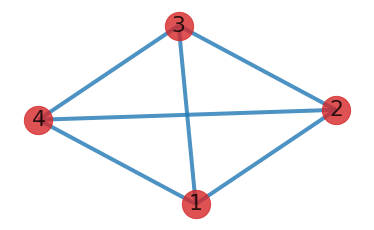

유향그래프:


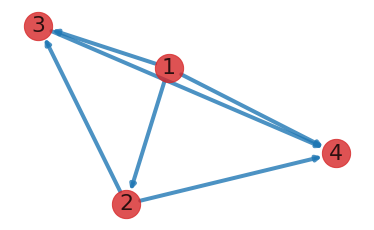

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.display import Image

plt.rcParams['figure.figsize'] = (5,3)

# 그래프 그리기
def makeGraph(V, E, Gtype):
    
    if Gtype == 0:
        G = nx.Graph()   # UndirectedGraph(무향 그래프)
        print('#무향그래프:')
    elif Gtype == 1:
        G = nx.DiGraph() # DirectedGraph(유향 그래프)
        print('유향그래프:')

    G.add_nodes_from(V) # 점 추가
    G.add_edges_from(E) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    nx.draw(G, with_labels=True, 
            node_color="tab:red", node_size=800, # 노드
            edge_color="tab:blue", width=4,      # 에지
            font_size=22, alpha=0.8)
    plt.show()
    
V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)}    
    
makeGraph(V, E, 0)  # 무향 그래프 만들기
makeGraph(V, E, 1)  # 유향 그래프 만들기


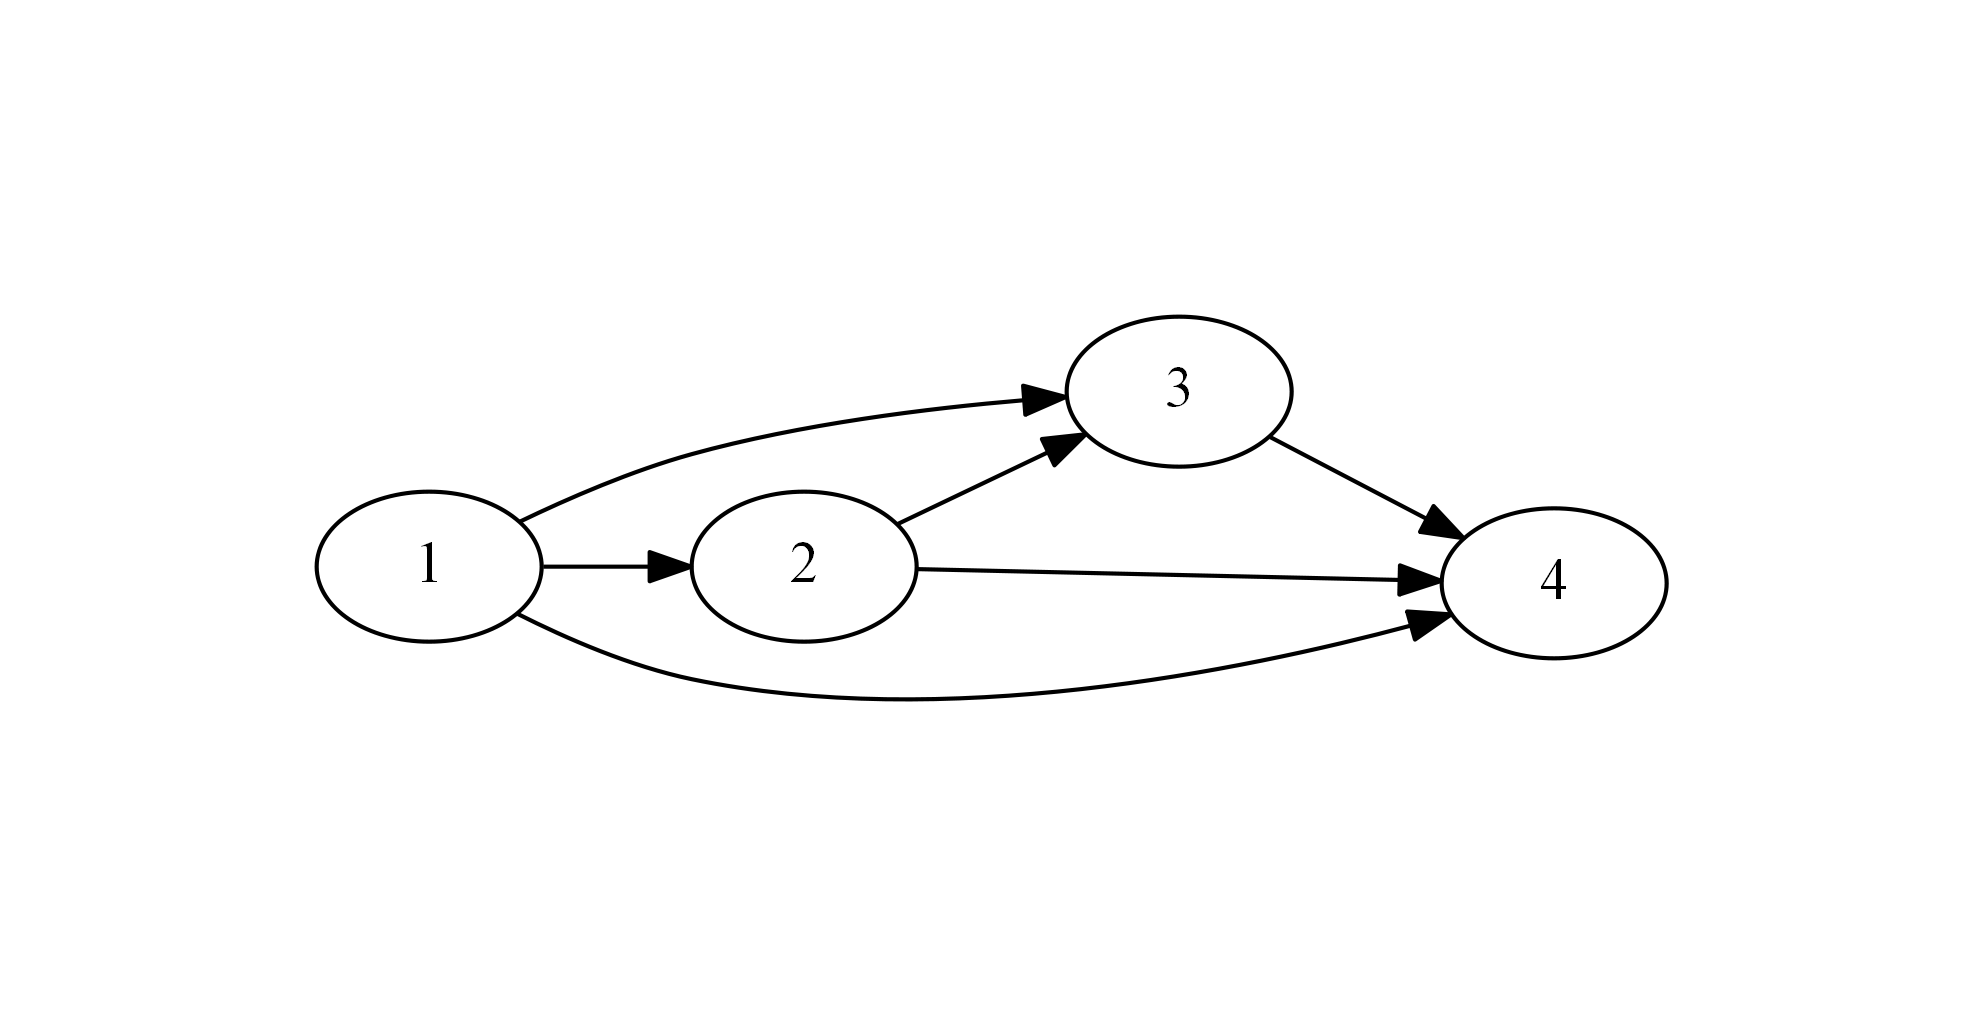

In [3]:
from IPython.core.display import Image
import networkx as nx

V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)} 

G = nx.DiGraph() # DirectedGraph(유향 그래프)

G.add_nodes_from(V) # 점 추가
G.add_edges_from(E) # 간선 추가

d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
d1.set_rankdir("LR")   # 수평방향
d1.set_margin(1)
Image(d1.create_png(), width=600)


### [예제 7-2] 인접 행렬로 나타내기

#### # 인접 행렬 나타내기

In [2]:
import numpy as np

# 숫자 순서쌍으로 변환
def convertEdgeToNum(V, E):
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    if any(isinstance(v, str) for v in V):
        data  = { v:idx+1 for idx, v in enumerate(V) }  # V 원소 숫자로 표시
        result= [(data[v1], data[v2])  for v1, v2 in E] # E 순서쌍으로 표시    
        return result
    else:
        return E


# 인접행렬 만들기
def makeAdjacencyMatirx(V, E, Gtype):
    
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    E = convertEdgeToNum(V, E)
    print(E)

    # 빈(0) 행렬 만들기
    adj = [[0 for _ in range(len(V))] for _ in range(len(V))]

    # 인접 행렬 만들기
    for t in E:
        src, dest = t
        if Gtype == 0:   # 무향            
            adj[src-1][dest-1] = 1
            adj[dest-1][src-1] = 1
        elif Gtype == 1: # 유향
            adj[src-1][dest-1] = 1

    print(np.array(adj) )        
    return np.array(adj) 
   
    
V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)} 

print('#무향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, 0)  # 무향 그래프 인접행렬
print()
print('#유향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, 1)  # 유향 그래프 인접행렬

#무향 그래프 인접행렬:
{(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1, 4)}
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]

#유향 그래프 인접행렬:
{(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1, 4)}
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]


array([[0, 1, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

#### # 연결 리스트 나타내기

In [127]:
# 연결리스트 만들기
def makeLinkedList(V, E, Gtype):
    
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    E = convertEdgeToNum(V, E)
    
    adj = [[] for _ in range(len(V))]

    for t in E:
        src, dest = t    
        if Gtype == 0:   # 무향            
            adj[src-1].append(dest)
            adj[dest-1].append(src)
        elif Gtype == 1: # 유향
            adj[src-1].append(dest)
    
    # 연결 리스트 출력하기
    if isinstance(V, str): # V 원소가 문자인 경우
        for idx, v in enumerate(adj):
            v.sort()
            print(f'v[{V[idx]}]의 연결 리스트 =  {V[v-1]}')
    else:
        for idx, v in enumerate(adj):
            v.sort()
            print(f'v[{idx+1}]의 연결 리스트 =  {v}')
        
    return adj
    
V = [1,2,3,4]
E = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)] 

print('#무향 그래프 연결리스트:')
makeLinkedList(V, E, 0)  # 무향 그래프 인접리스트
print()
print('#유향 그래프 연결리스트:')
makeLinkedList(V, E, 1)  # 유향 그래프 인접리스트

#무향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2, 3, 4]
v[2]의 연결 리스트 =  [1, 3, 4]
v[3]의 연결 리스트 =  [1, 2, 4]
v[4]의 연결 리스트 =  [1, 2, 3]

#유향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2, 3, 4]
v[2]의 연결 리스트 =  [3, 4]
v[3]의 연결 리스트 =  [4]
v[4]의 연결 리스트 =  []


[[2, 3, 4], [3, 4], [4], []]

### [실습] 그래프 & 인접행렬 & 연결리스트 표현하기

#무향그래프:


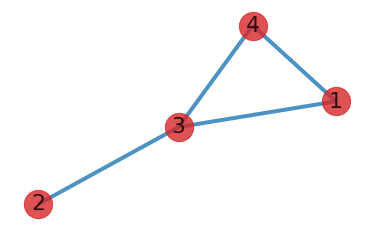

#무향 그래프 인접행렬:
{(2, 3), (1, 3), (3, 4), (1, 4)}
[[0 0 1 1]
 [0 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]
#무향 그래프 연결리스트:
v[1]의 연결 리스트 =  [3, 4]
v[2]의 연결 리스트 =  [3]
v[3]의 연결 리스트 =  [1, 2, 4]
v[4]의 연결 리스트 =  [1, 3]


[[3, 4], [3], [1, 2, 4], [1, 3]]

In [6]:
V = {1,2,3,4}
E = {(1,3),(1,4),(2,3),(3,4)} 
Gtype = 0

makeGraph(V, E, Gtype)            # 무향 그래프 만들기
print('#무향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, Gtype)  # 무향 그래프 인접행렬
print('#무향 그래프 연결리스트:')
makeLinkedList(V, E, Gtype)       # 무향 그래프 연결리스트

유향그래프:


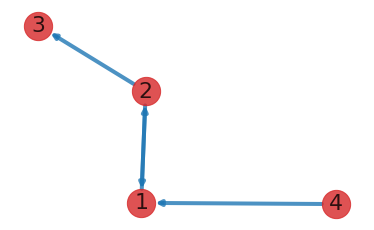

#유향 그래프 인접행렬:
{(2, 3), (1, 2), (4, 1), (2, 1)}
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 0 0 0]]
#유향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2]
v[2]의 연결 리스트 =  [1, 3]
v[3]의 연결 리스트 =  []
v[4]의 연결 리스트 =  [1]


[[2], [1, 3], [], [1]]

In [75]:
V = {1,2,3,4}
E = {(1,2),(2,1),(2,3),(4,1)} 
Gtype = 1

makeGraph(V, E, Gtype)             # 유향 그래프 만들기
print('#유향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, Gtype)  # 유향 그래프 인접행렬
print('#유향 그래프 연결리스트:')
makeLinkedList(V, E, Gtype)      # 유향 그래프 연결리스트

### # 그래프의 정점의 차수 출력하기

In [9]:
import numpy as np

# 정점의 차수
def getVertexDegree(V, E, Gtype):   
    result = []
    
    # Edge의 원소를 counting 한다.
    if Gtype == 0: # 무향
        print('#무향 그래프 정점의 차수')
        data = [ [v1, v2] for v1, v2 in E] # 튜플을 리스트로 만들기
        data = sum(data,[])                # 1 차원 리스트로 만들기
        for v in V:
            print(f'정점 [{v}]의 차수: {data.count(v)}')
            result.append(data.count(v))
    
    # 관계 행렬을 이용한다.
    elif Gtype == 1: # 유향
        print('#유향 그래프 정점의 차수')
        matrix = makeAdjacencyMatirx(V, E, Gtype)    
        
        degrees1 = np.sum(matrix, axis=0).tolist()  # 내차수
        degrees2 = np.sum(matrix, axis=1).tolist()  # 외차
        for idx, v in enumerate(degrees1):
            print(f'정점 [{V[idx]}]의 내차수: {v} 외차수: {degrees2[idx]} ')
            result.append([v, degrees2[idx]])
            
    return result

### [예제 7-3] 유향 그래프의 정점의 차수 출력하기

In [10]:
V = ['a','b','c','d', 'e']   # 출력을 위해 {}대신 []사용함
E = [('a','b'),('a','d'),('b','c'),('b','d'),
     ('b','e'),('c','a'),('c','e'),('d','c')] 

Gtype = 1 # 유향
getVertexDegree(V, E, Gtype)

#유향 그래프 정점의 차수
[(1, 2), (1, 4), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 3)]
[[0 1 0 1 0]
 [0 0 1 1 1]
 [1 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 0]]
정점 [a]의 내차수: 1 외차수: 2 
정점 [b]의 내차수: 1 외차수: 3 
정점 [c]의 내차수: 2 외차수: 2 
정점 [d]의 내차수: 2 외차수: 1 
정점 [e]의 내차수: 2 외차수: 0 


[[1, 2], [1, 3], [2, 2], [2, 1], [2, 0]]

### [예제 7-4] 무향 그래프의 정점의 차수 출력하기

In [11]:
V = ['A','B','C','D', 'E']   # 출력을 위해 {}대신 []사용함
E = [('A','B'),('B','A'),('B','C'),('B','E'),('E','D'),('D','D')] 

Gtype = 0 # 유향
getVertexDegree(V, E, Gtype)

#무향 그래프 정점의 차수
정점 [A]의 차수: 2
정점 [B]의 차수: 4
정점 [C]의 차수: 1
정점 [D]의 차수: 3
정점 [E]의 차수: 2


[2, 4, 1, 3, 2]

---------------------

## 7-2. 여러 가지 그래프

### # 가중치 그래프 그리기
- 방법1: 
> G.add_weighted_edges_from([('B','C',13),('C','F',21),('C','E',25)])
- 방법2: 
> G.add_edges_from([('B','C',{'weight':13}),('C','F',{'weight':21}),('C','E',{'weight':25})]

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# E에 가중치 추가하기
def makeWeight(E, W):     
    # 방법1: 
    result = [(v1, v2, W[idx]) for idx, (v1, v2) in enumerate(E) ]
#     # 방법2: 
#     result = [(v1, v2, {'weight':W[idx]}) for idx, (v1, v2) in enumerate(E) ]

    return result
    

# 가중치 그래프 그리기
def makeWeightedGraph(V, E, W, Gtype):
    
    E = makeWeight(E, W) # 가중치 추가하기
    
    if Gtype == 0:
        G = nx.Graph()   # UndirectedGraph(무향 그래프)
        print('#무향그래프: 가중치')
    elif Gtype == 1:
        G = nx.DiGraph() # DirectedGraph(유향 그래프)
        print('유향그래프: 가중치')

    G.add_nodes_from(V) # 점 추가
    # 방법1:    
    G.add_weighted_edges_from(E) # 간선 추가
#     # 방법2: 
#     G.add_edges_from(E) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    pos = nx.spring_layout(G)      # 위치 정보 만들기
    weight = nx.get_edge_attributes(G, 'weight')
    
    nx.draw(G, pos, with_labels=True, 
            node_color="tab:red", node_size=800, # 노드
            edge_color="tab:blue", width=4,      # 에지
            font_size=22, alpha=0.8)   
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight) # 가중치 정보 덧그리기    
    plt.show()
    
    return G    

### [예제 7-14] 가중치 그래프 그리기

#무향그래프: 가중치


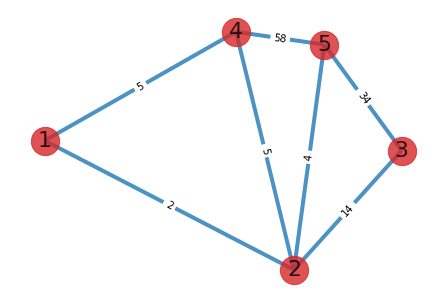

In [71]:
V = [1,2,3,4,5]
E = [(1,2),(1,4),(2,3),(2,4),(2,5),(3,5),(4,5)]
W = [2,5,14,5,4,34,58]
Gtype = 0

makeWeightedGraph(V, E, W, Gtype)

### [예제 7-15] 오일러 그래프 판별
#### #오일러 루프 조건 (탐색을 이용해야한다.)
- 시작점과 종점이 같다(순환:loop)
- 간선을 한번만 지난다

#### # 오일러 그래프 조건
- 정점의 차수가 모두 짝수여야한다.

In [16]:
def isEulerGraph(V, E, Gtype):
    
    # 정점의 차수 : 인접행렬 이용함
    result = getVertexDegree(V, E, Gtype) 
    result = [True if i%2==0 else False for i in result] # 짝수여부 판별
    if all(result) : # 모두 참이면
        print('정점이 모두 짝수이며 오일러 그래프 이다.')
        return True
    else:
        print('정점이 모두 짝수가 아니며, 오일러 그래프가 아니다.')
        return False

    
V = [1,2,3,4,5]
E = [(1,2),(1,4),(1,5),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)]
Gtype = 0 # 무향 그래프

# 오일러 그래프 판별
isEulerGraph(V, E, Gtype)

#무향 그래프 정점의 차수
정점 [1]의 차수: 4
정점 [2]의 차수: 4
정점 [3]의 차수: 4
정점 [4]의 차수: 4
정점 [5]의 차수: 4
정점이 모두 짝수이며 오일러 그래프 이다.


True

---------------------

### [예제 7-16] 해밀턴 그래프 

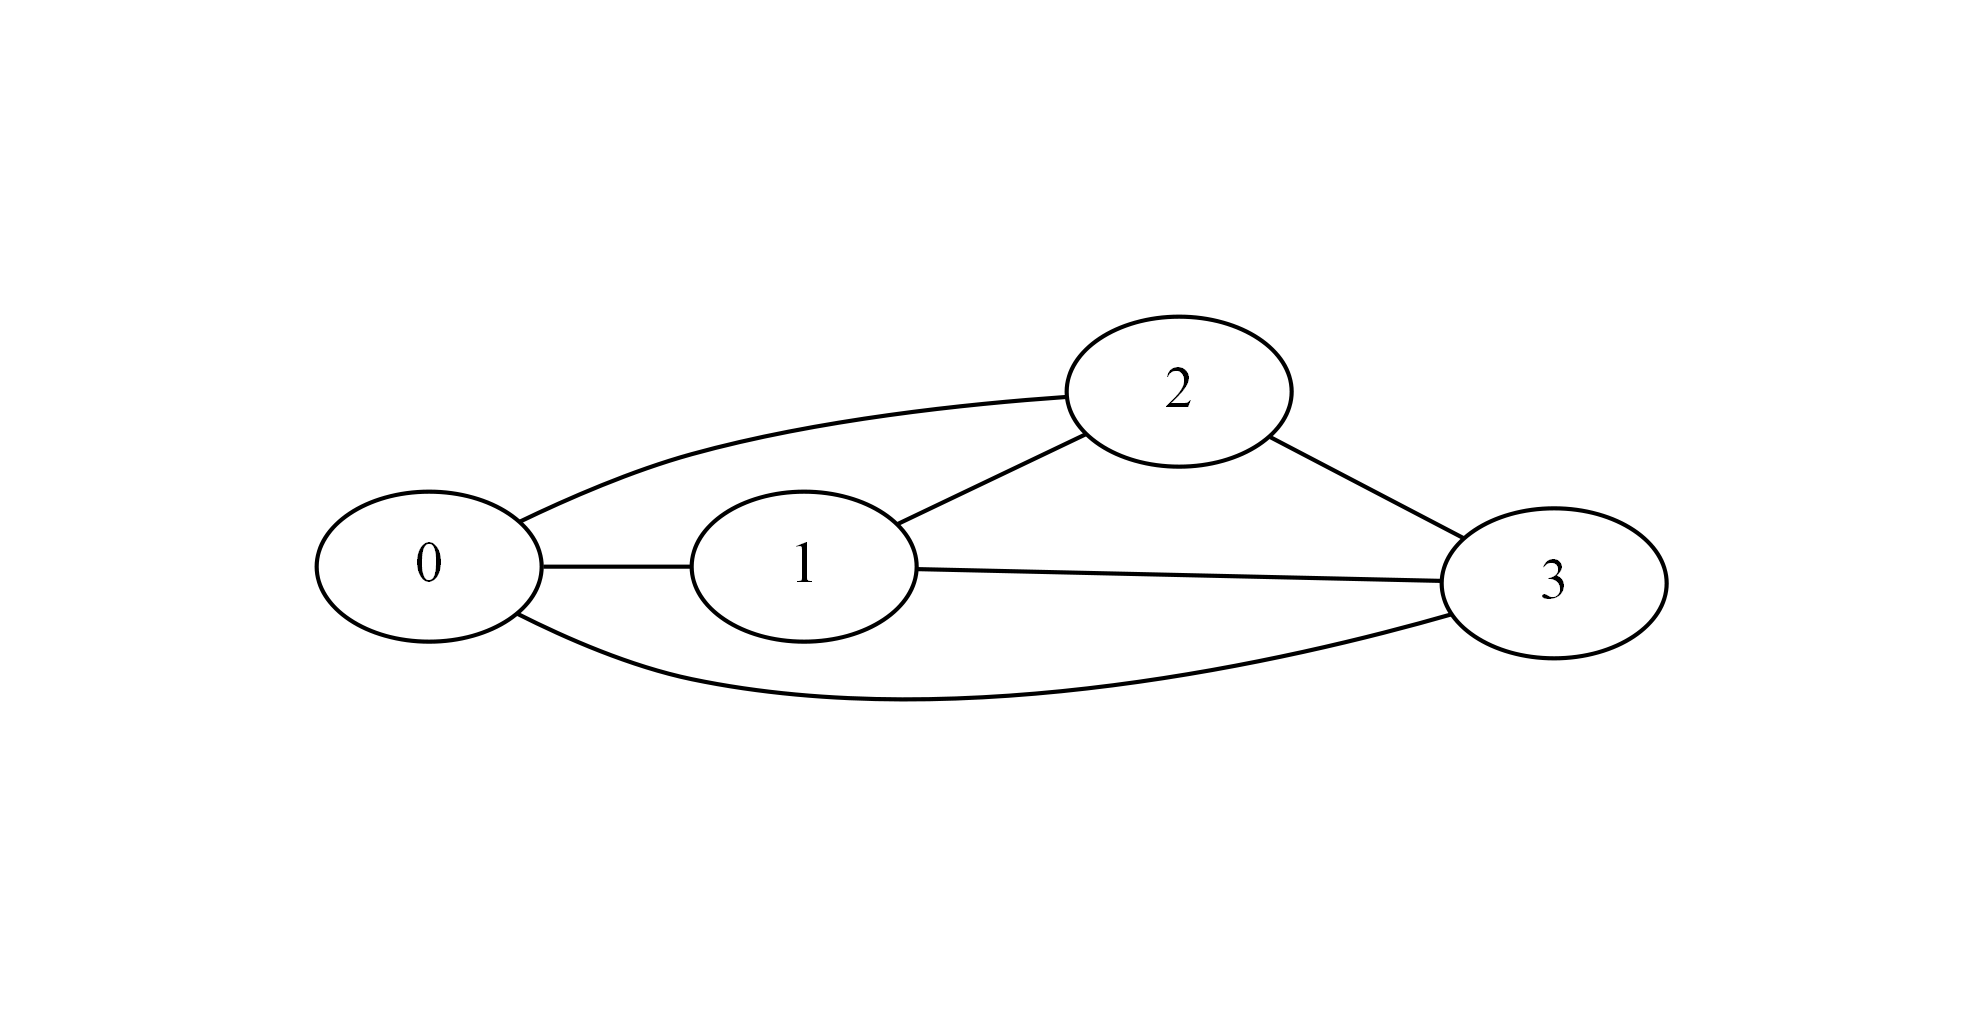

In [97]:
# 그래프 그리기
from IPython.display import Image
import networkx as nx
import numpy as np 

if Gtype == 0: G = nx.Graph() # Graph(무향 그래프)
if Gtype == 1: G = nx.DiGraph() # DirectedGraph(유향 그래프)

G.add_nodes_from(V) # 점 추가
G.add_edges_from(E) # 간선 추가

d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
d1.set_rankdir("LR")   # 수평방향 --> 이 코드 없으면 수직방향
d1.set_margin(1)
Image(d1.create_png(), width=500)

### #해밀턴 그래프 - 판매원 탐방 문제:TSP(Traveling Salesman Problem)
- 출처: https://networkx.org/documentation/stable/auto_examples/drawing/plot_tsp.html#sphx-glr-auto-examples-drawing-plot-tsp-py

G=Graph with 20 nodes and 56 edges
pos={0: [0.23796462709189137, 0.5442292252959519], 1: [0.36995516654807925, 0.6039200385961945], 2: [0.625720304108054, 0.06552885923981311], 3: [0.013167991554874137, 0.83746908209646], 4: [0.25935401432800764, 0.23433096104669637], 5: [0.9956448355104628, 0.47026350752244794], 6: [0.8364614512743888, 0.47635320869933495], 7: [0.6390681405441619, 0.15061642402352393], 8: [0.6348606582851885, 0.8680453071432968], 9: [0.5231812103833013, 0.7412518562014903], 10: [0.6714114753695926, 0.0640314382269973], 11: [0.7582302462868173, 0.5910995829313176], 12: [0.3012676595157123, 0.031011751469749993], 13: [0.8655272369789456, 0.47274908866546683], 14: [0.7188239240658031, 0.8788128002554817], 15: [0.7141294836112025, 0.9210986675838745], 16: [0.3949634040007439, 0.8009087709852283], 17: [0.44462105605076063, 0.9355867217045211], 18: [0.8788666603380416, 0.09745430973087721], 19: [0.1359688602006689, 0.21698694123313733]}
------------------------------
cycle=

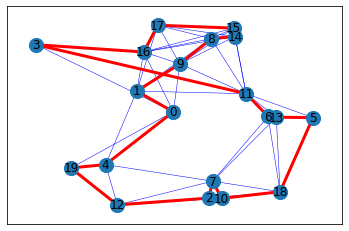

In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")
print(f'G={G}')
print(f'pos={pos}')
print('-'*30)

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

H = G.copy()

# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):    
    for j in range(i + 1, len(pos)):
        # math.hypot : 직각삼각형의 빗변의 길이 = 거리
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)
#         print(f'i={i},j={j}, dist={dist}')

# 판매원 탐방문제에서 최적 route       
cycle = nx_app.christofides(G, weight="weight")  
print(f'cycle={cycle}')
edge_list = list(nx.utils.pairwise(cycle))
print(f'edge_list={edge_list}')


# 그래프 그리기
# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)
print('-'*30)
print("The route of the traveller is:", cycle)
plt.show()

### [예제 7-18] 판매원 탐방 문제 : TSP(Traveling Salesman Problem)

The route of the traveller is: ['a', 'd', 'c', 'b', 'a']


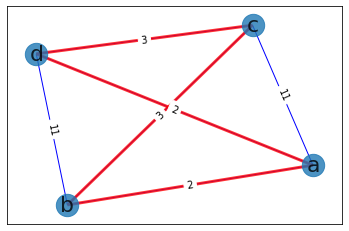

In [95]:
import networkx as nx
import networkx.algorithms.approximation as nx_ap
import math
import matplotlib.pyplot as plt

# Traveling Salesman Problem
def makeTSPGraph(V, E, Gtype):
    
    if Gtype == 0: G = nx.Graph() # UndirectedGraph(무향 그래프)
    if Gtype == 1: G = nx.DiGraph() # DirectedGraph(유향 그래프)

    G.add_nodes_from(V)          # 노드 추가
    G.add_weighted_edges_from(E) # 가중치 간선 추가
    
    H = G.copy()
    
    # 판매원 탐방문제에서 최적 route       
    cycle = nx_app.christofides(G, weight="weight")  
    edge_list = list(nx.utils.pairwise(cycle))
#     print(f'cycle={cycle}')
#     print(f'edge_list={edge_list}')

    
    # 위치  & 가중치 정보 만들기
    pos = nx.spring_layout(G)      
    weight = nx.get_edge_attributes(G, 'weight') 

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    nx.draw_networkx_edges(H, pos, edge_color="blue", width=1)
    
    # Draw the route
    nx.draw_networkx(
        G,
        pos,
        with_labels=True,
        edgelist=edge_list,
        edge_color="red",
        node_size=500,
        width=3,
        font_size=22, alpha=0.8
    )
    # 가중치 정보 덧그리기    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)    
    print("The route of the traveller is:", cycle)    
    plt.show()
    
    return G   

#------------------
# 해밀턴 그래프 : 판매원 탐방 문제(TSP)
#------------------
V = ['a','b','c','d']
E = [('a','b', 2),('a','c', 11),('a','d', 2),
     ('b','c', 3),('b','d', 11),('c','d',3)]

G = makeTSPGraph(V, E, 0) # 판매원 탐방문제(무향그래프)



-----------------------------

### 그래프 탐색(DFS, BFS. Dijkstra, Heuristic Search) 알고리즘

-------------------------------

## 7-3. 평면 그래프

### [예제 7-19] 평면 그래프 판별

Vertex: [1, 2, 3, 4, 5, 6]
Edge: [(1, 3), (1, 4), (1, 5), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6), (4, 6)]
--------------------------------------------------
평면 그래프가 맞습니다.
#무향그래프:


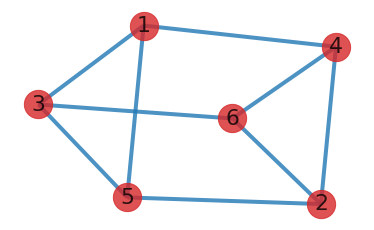

In [104]:
import networkx as nx

def isPlanarGraph(V, E):  
    G = nx.Graph(E)
    is_planar, P = nx.check_planarity(G)
    
    return is_planar

V = [1,2,3,4,5,6]
E = [(1,3),(1,4),(1,5),(2,4),(2,5),(2,6),
     (3,5),(3,6),(4,6)]
print(f'Vertex: {V}')
print(f'Edge: {E}')
print('-'*50)

if isPlanarGraph(V, E): print('평면 그래프가 맞습니다.')
else: print('평면 그래프가 아닙니다.')
    
makeGraph(V, E, 0)

Vertex: [1, 2, 3, 4, 5]
Edge: [(1, 2), (1, 4), (1, 5), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
--------------------------------------------------
평면 그래프가 아닙니다.
#무향그래프:


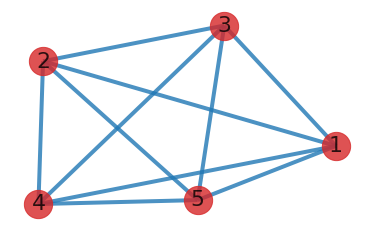

In [105]:
V = [1,2,3,4,5]
E = [(1,2),(1,4),(1,5),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)]
print(f'Vertex: {V}')
print(f'Edge: {E}')
print('-'*50)

if isPlanarGraph(V, E): print('평면 그래프가 맞습니다.')
else: print('평면 그래프가 아닙니다.')
    
makeGraph(V, E, 0)

------------------------

## 7-3. 평면 그래프

### [예제 7-21] 웰치-포웰 알고리즘 
- **[사전 필요 정보]**
1. 그래프의 정점의 차수 계산
2. 정점의 인접 리스트 만들기
- **[알고리즘]**
1. 그래프 𝐺의 정점의 차수가 내림차순 배열 정렬
2. 배열의 첫 번째 정점은 첫 번째 색으로 착색하고 배열의 순서대로 이미 착색된 정점과 인접하지 않은 정점을 모두 같은 색으로 착색
3. 배열에서 먼저 나타나는 착색되지 않은 정점을 두 번째 색으로 착색하고 2와 동일한 처리
4. 모든 정점이 착색되도록 반복

#무향 그래프 정점의 차수
정점 [1]의 차수: 4
정점 [2]의 차수: 4
정점 [3]의 차수: 5
정점 [4]의 차수: 4
정점 [5]의 차수: 6
정점 [6]의 차수: 3
정점 [7]의 차수: 5
정점 [8]의 차수: 3
v[1]의 연결 리스트 =  [2, 3, 4, 7]
v[2]의 연결 리스트 =  [1, 3, 4, 5]
v[3]의 연결 리스트 =  [1, 2, 5, 6, 7]
v[4]의 연결 리스트 =  [1, 2, 5, 7]
v[5]의 연결 리스트 =  [2, 3, 4, 6, 7, 8]
v[6]의 연결 리스트 =  [3, 5, 8]
v[7]의 연결 리스트 =  [1, 3, 4, 5, 8]
v[8]의 연결 리스트 =  [5, 6, 7]
#1.내림차순 정렬(정점,차수): [(5, 6), (3, 5), (7, 5), (1, 4), (2, 4), (4, 4), (6, 3), (8, 3)]
[0, 2, 1, 1, 0, 2, 2, 1]


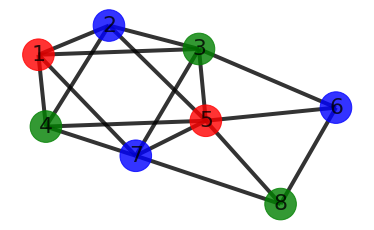

In [143]:
# 정점의 수와 간선 입력
V = [1,2,3,4,5,6,7,8]
E = {(1,2),(1,3),(1,4),(1,7),(2,3),(2,4),(2,5),(3,5),
     (3,6),(3,7),(4,5),(4,7),(5,6),(5,7),(5,8),(6,8),(7,8)}

# 사전 필요 정보
degree = getVertexDegree(V, E, 0) # 정점의 차수
adjList= makeLinkedList(V, E, 0)  # 정점의 인접리스트


#-----------------
# 그래프 착색하기 : 웰치-포웰 알고리즘
#-----------------
#1. 정점 차수의 내림차순으로 정렬
V_dict = dict(zip(V, degree))         # 정점:차수의 딕셔너리 형태로 지정
V_dict = sorted(V_dict.items(), key=lambda x:x[1], reverse=True)  # 차수 내림차순으로 정렬
print(f'#1.내림차순 정렬(정점,차수): {V_dict}') 


#2.3.4 인접 정접을 제외하고 색상 부여하기
result = dict()
assigned = set()
color = 0
for v, d in V_dict: # (정점,차수)
    # 인접행렬이 아니고, 색상할당 집합에 없는 정점 추출하기
    tmp = [v_ for v_ in V if v_ not in adjList[v-1] and v_ not in assigned ] 
    for i in tmp: 
        assigned.add(i)    # 색상 할당 정점 집합에 추가
        result[i] = color  # 정점에 색상 할당
    color += 1
result = sorted(result.items(), key=lambda x:x[0]) # 정점순서대로 정렬하기
colors_map = [o for v, o in result]
print(colors_map)



#그래프 그리기: 시각화하기
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E) 

# 색상 직접 지정할 경우
colors = ['RED', 'GREEN','BLUE','PINK','YELLOW', 'ORANGE']
colors_map = [colors[c] for c in colors_map ]

nx.draw(G, with_labels=True,
    node_color=colors_map,
    node_size=1000,
    width=4,
    font_size=22, alpha=0.8)
plt.show()


THE END